 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Set the file path
whale_data = Path("Resources/whale_returns.csv")

In [3]:
# Reading whale returns
# Read the CSV and set the 'Date' column as a datetime index to the DataFrame
whale_df = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sort datetime index in ascending order (past to present)
whale_df = whale_df.sort_index()

# Display a few rows from the DataFrame
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_df = whale_df.dropna()

In [6]:
# Validate no more missing values
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [7]:
# Check Data Types
whale_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [8]:
# Set the file path
algo_data = Path("Resources/algo_returns.csv")

In [9]:
# Reading algorithmic returns
# Read the CSV and set the 'Date' column as a datetime index to the DataFrame
algo_df = pd.read_csv(algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sort datetime index in ascending order (past to present)
algo_df = algo_df.sort_index()

# Display a few rows from the DataFrame
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [10]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [11]:
# Drop nulls
algo_df = algo_df.dropna()

In [12]:
# Validate no more missing values
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [13]:
# Check Data Types
algo_df.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [14]:
# Set the file path
sp_tsx_data = Path("Resources/sp_tsx_history.csv")

In [15]:
# Reading S&P TSX 60 Closing Prices
# Read the CSV and set the 'Date' column as a datetime index to the DataFrame
sp_tsx_df = pd.read_csv(sp_tsx_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sort datetime index in ascending order (past to present)
sp_tsx_df = sp_tsx_df.sort_index()

# Display a few rows from the DataFrame
sp_tsx_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [16]:
# Count nulls
sp_tsx_df.isnull().sum()

Close    0
dtype: int64

In [17]:
# Check Data Types
sp_tsx_df.dtypes

Close    object
dtype: object

In [18]:
# Fix Data Types
# Remove the '$' sign from the 'Close' column
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace("$", "")
# Remove the ',' sign from the 'Close' column
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace(",", "")
sp_tsx_df["Close"].head()

C:\Users\claud\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


Date
2012-10-01    12370.19
2012-10-02    12391.23
2012-10-03    12359.47
2012-10-04    12447.68
2012-10-05    12418.99
Name: Close, dtype: object

In [19]:
# Convert the data type by casting 'Close' series as float
sp_tsx_df["Close"] = sp_tsx_df["Close"].astype("float")
# Check Data Types again to confirm change
sp_tsx_df.dtypes

Close    float64
dtype: object

In [20]:
# Calculate Daily Returns
sp_tsx_returns = sp_tsx_df.pct_change()
sp_tsx_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [21]:
# Drop nulls
sp_tsx_returns = sp_tsx_returns.dropna()

In [22]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_returns.columns = ["S&P TSX"]
sp_tsx_returns.head()

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [23]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
portfolio_returns = pd.concat([whale_df, algo_df, sp_tsx_returns], axis="columns", join="inner")
portfolio_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Portfolios Daily Returns'}, xlabel='Date'>

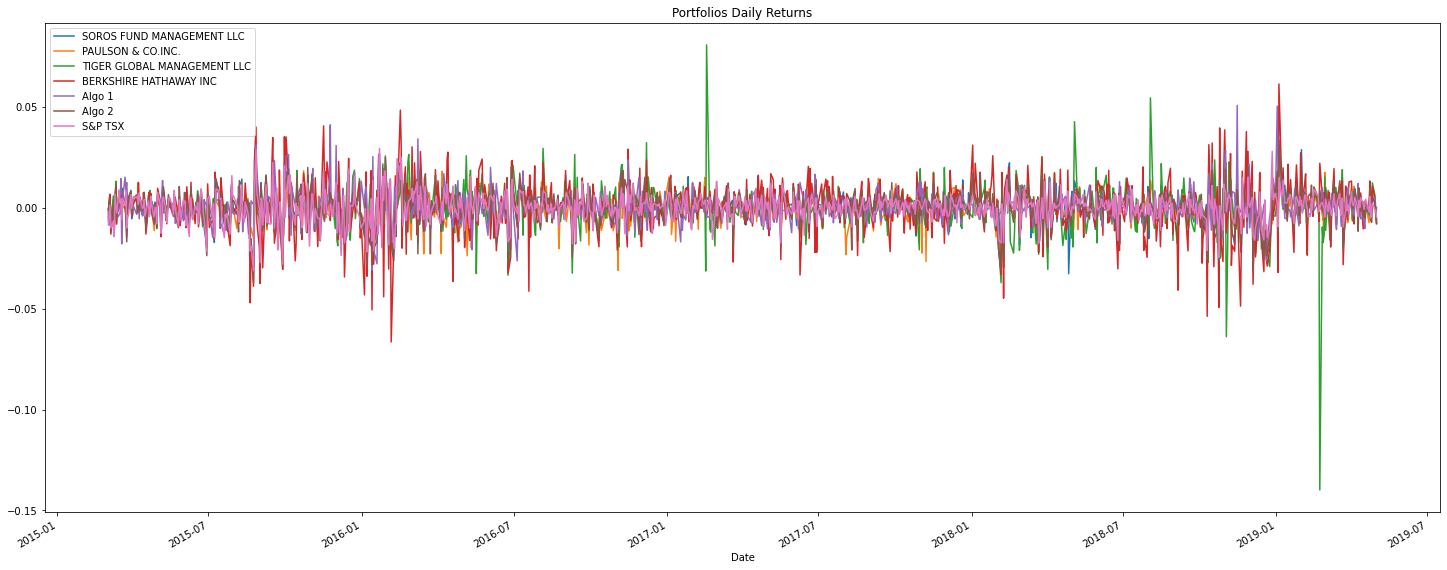

In [24]:
# Plot daily returns of all portfolios
portfolio_returns.plot(figsize=(25,10), title="Portfolios Daily Returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Portfolios Cumulative Returns'}, xlabel='Date'>

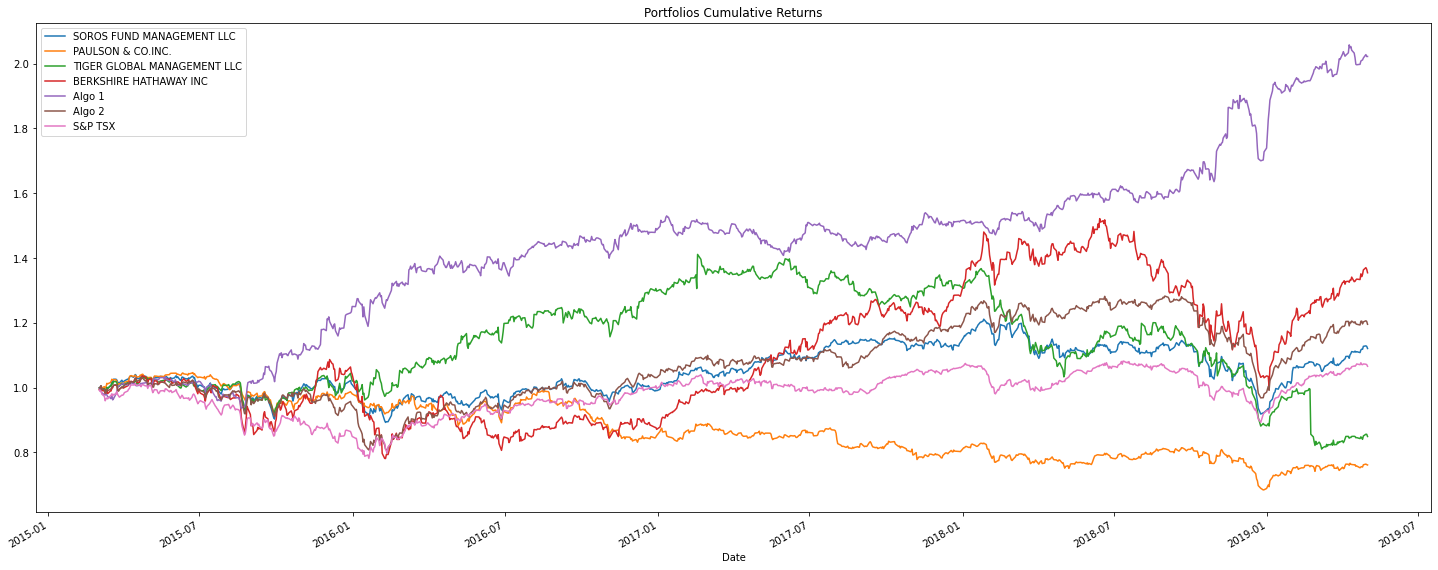

In [25]:
# Calculate cumulative returns of all portfolios
# Use the 'cumprod' function to calculate cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()


# Plot cumulative returns
cumulative_returns.plot(figsize=(25,10), title="Portfolios Cumulative Returns")

The 'Algo 1' porfolio outperforms the S&P TSX 60.

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolios Daily Returns'}>

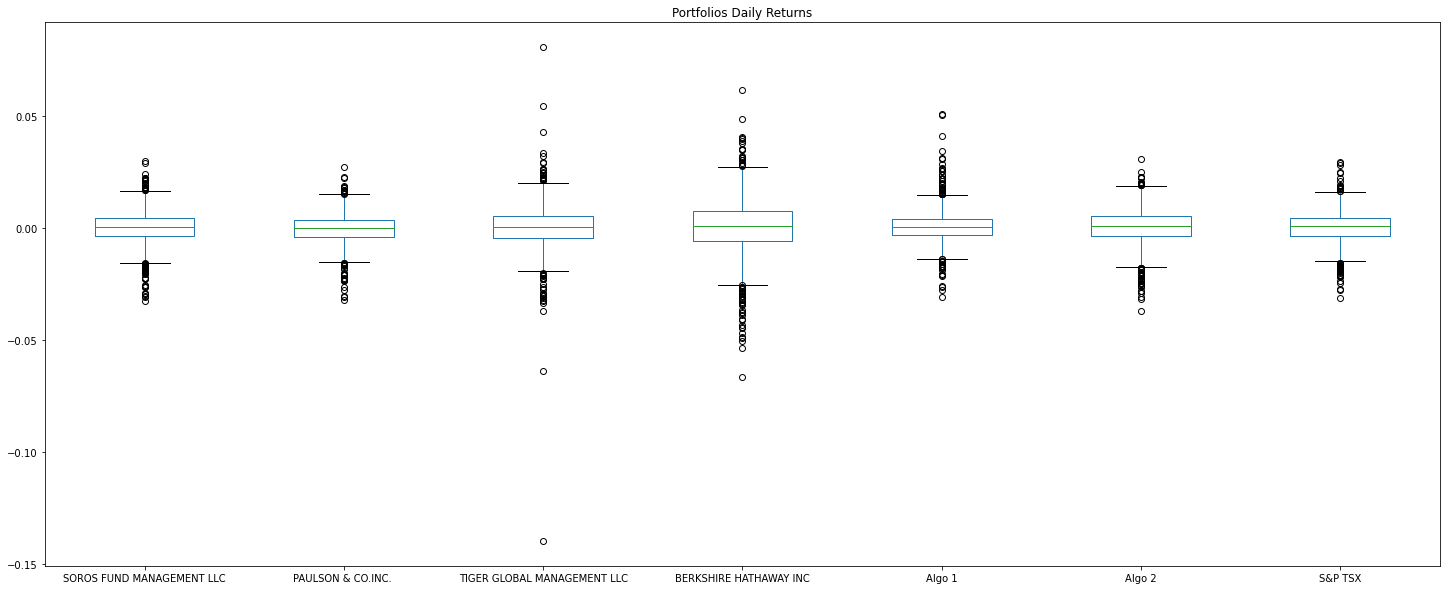

In [26]:
# Box plot to visually show risk
portfolio_returns.plot(kind="box", figsize=(25,10), title="Portfolios Daily Returns")

<AxesSubplot:title={'center':'Portfolios Cumulative Returns'}>

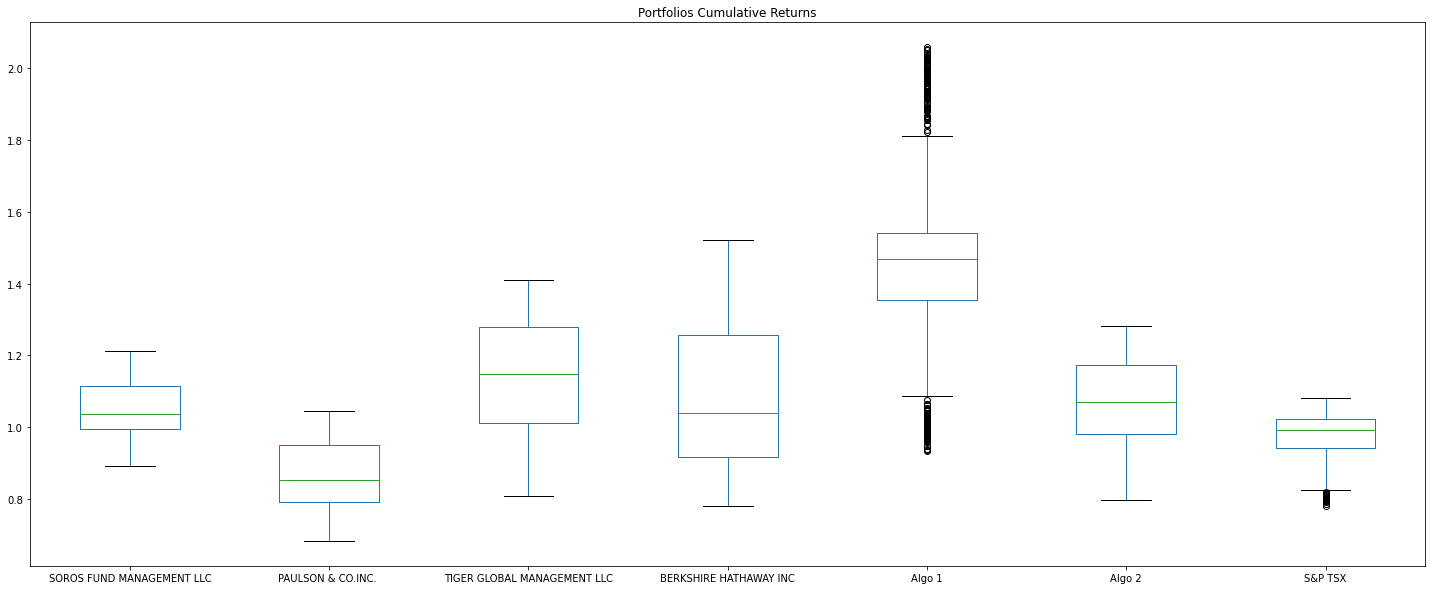

In [27]:
cumulative_returns.plot(kind="box", figsize=(25,10), title="Portfolios Cumulative Returns")

### Calculate Standard Deviations

In [28]:
# Calculate the daily standard deviations of all portfolios
all_portfolio_std = portfolio_returns.std()
all_portfolio_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [29]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_std = all_portfolio_std["S&P TSX"]

# Determine which portfolios are riskier than the S&P TSX 60
print("Portfolio riskier than the S&P TSX 60?")
all_portfolio_std > sp_tsx_std     


Portfolio riskier than the S&P TSX 60?


SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
S&P TSX                        False
dtype: bool

### Calculate the Annualized Standard Deviation

In [30]:
# Calculate the annualized standard deviation (252 trading days)
annual_portfolios_std = portfolio_returns.std() * np.sqrt(252)
annual_portfolios_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [31]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_portfolio_rolling_std = portfolio_returns.rolling(window=21).std()

<AxesSubplot:title={'center':'All Portfolios 21-Day STD '}, xlabel='Date'>

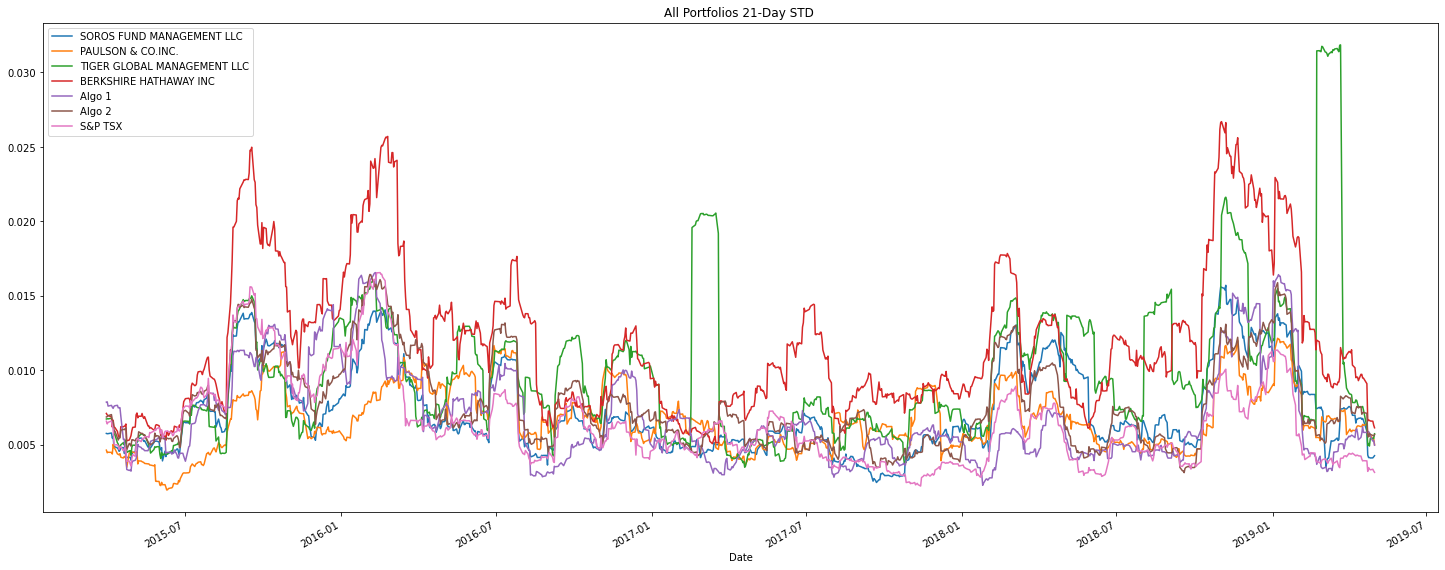

In [32]:
# Plot the rolling standard deviation
all_portfolio_rolling_std.plot(figsize=(25,10), title="All Portfolios 21-Day STD ")

### Calculate and plot the correlation

In [33]:
# Calculate the correlation
correlation = portfolio_returns.corr()

# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

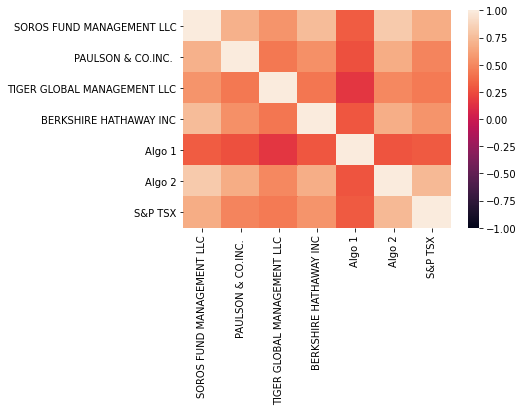

In [34]:
# import seaborn to plot correlation
import seaborn as sns

# Create a heatmap from the correlation values and adjust the scale
sns.heatmap(correlation, vmin=-1, vmax=1)

From the correlation plot we can see that the SOROS FUND MANAGEMENT LLC and the Algo 2 portfolios are
more correlated to the S&P TSX60 and thus may mimick it.

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Algo 1'}, xlabel='Date'>

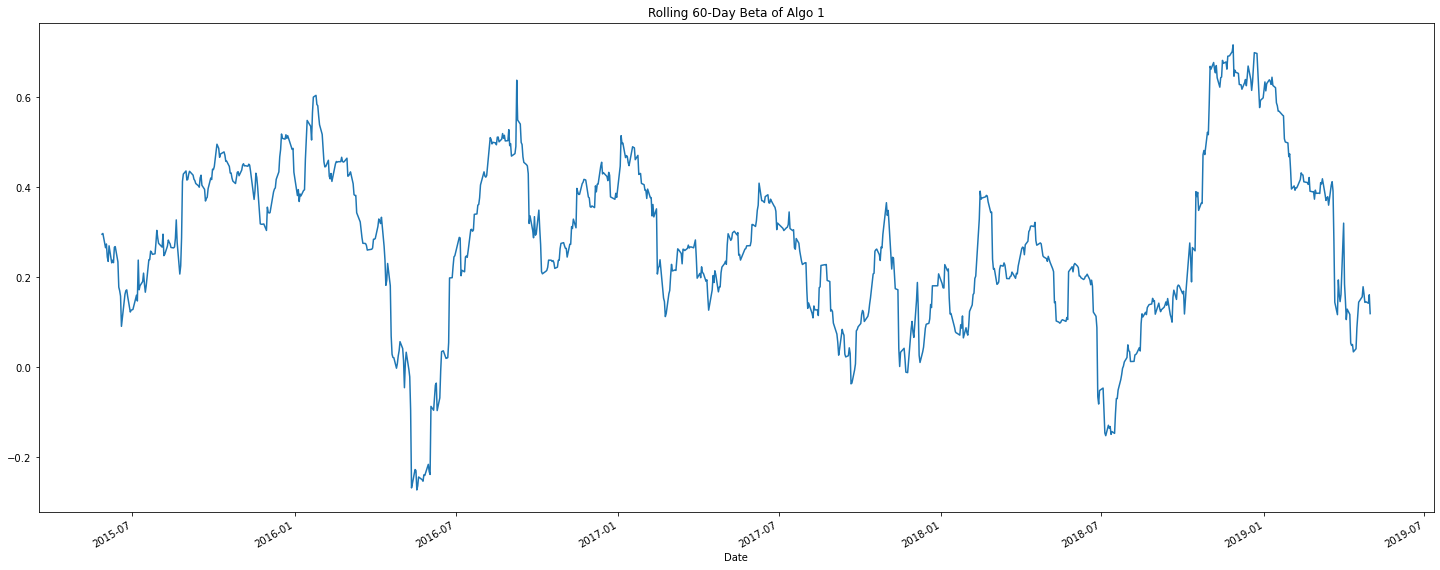

In [35]:
# Calculate 60-day rolling covariance of a single portfolio
rolling_algo_1_covariance = portfolio_returns["Algo 1"].rolling(window=60).cov(portfolio_returns["S&P TSX"])

# Calculate 60-day rolling variance of S&P TSX
rolling_variance = portfolio_returns["S&P TSX"].rolling(window=60).var()

# Computing 60-day rolling beta
rolling_algo_1_beta = rolling_algo_1_covariance / rolling_variance

# Plot beta trend
rolling_algo_1_beta.plot(figsize=(25,10), title="Rolling 60-Day Beta of Algo 1")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [36]:
# Use `ewm` to calculate the rolling window
all_portfolio_ewm_std  = portfolio_returns.ewm(halflife=21).std()
all_portfolio_ewm_std.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.004936
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.005205
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.004517


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [37]:
# Annualized Sharpe Ratios
sharpe_ratios = (portfolio_returns.mean() * 252) / (annual_portfolios_std)
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

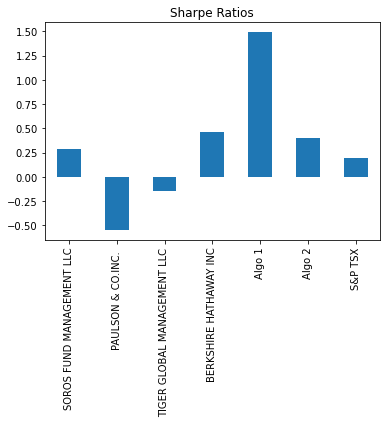

In [38]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

The algorithmic strategy 'Algo 1' outperforms both the market (S&P TSX 60) and the whale portfolios because its sharpe ratio is much bigger. However, algorithmic strategy 'Algo 2' although it has a larger sharpe ratio than the market, does not outperform the 'BERKSHIRE HATHAWAY INC' whale portfolio which has a larger sharpe ratio than it.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [39]:
# Reading data from 1st stock (Facebook)
# Set the file path
fb_data = Path("Resources/fb_google_finance.csv")

# Read the CSV and set the 'Date' column as a datetime index to the DataFrame
fb_df = pd.read_csv(fb_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Display a few rows from the DataFrame
fb_df.head()

,Close
Date,
2018-01-02,181.42
2018-01-03,184.67
2018-01-04,184.33
2018-01-05,186.85
2018-01-08,188.28


In [40]:
# Count nulls
fb_df.isnull().sum()

Close    0
dtype: int64

In [41]:
# Check Data Types
fb_df.dtypes

Close    float64
dtype: object

In [42]:
# Reading data from 2nd stock (Tesla)
# Set the file path
tsla_data = Path("Resources/tsla_google_finance.csv")

# Read the CSV and set the 'Date' column as a datetime index to the DataFrame
tsla_df = pd.read_csv(tsla_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Display a few rows from the DataFrame
tsla_df.head()

,Close
Date,
2018-01-02,64.11
2018-01-03,63.45
2018-01-04,62.92
2018-01-05,63.32
2018-01-08,67.28


In [43]:
# Count nulls
tsla_df.isnull().sum()

Close    0
dtype: int64

In [44]:
# Check Data Types
tsla_df.dtypes

Close    float64
dtype: object

In [45]:
# Reading data from 3rd stock (Nike)
# Set the file path
nke_data = Path("Resources/nke_google_finance.csv")

# Read the CSV and set the 'Date' column as a datetime index to the DataFrame
nke_df = pd.read_csv(nke_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Display a few rows from the DataFrame
nke_df.head()

,Close
Date,
2018-01-02,63.49
2018-01-03,63.48
2018-01-04,63.44
2018-01-05,63.98
2018-01-08,64.55


In [46]:
# Count nulls
nke_df.isnull().sum()

Close    0
dtype: int64

In [47]:
# Check Data Types
nke_df.dtypes

Close    float64
dtype: object

In [48]:
# Combine all stocks in a single DataFrame
custom_portfolio = pd.concat([fb_df, tsla_df, nke_df], axis="columns", join="inner")
custom_portfolio.head()

,Close,Close,Close
Date,,,
2018-01-02,181.42,64.11,63.49
2018-01-03,184.67,63.45,63.48
2018-01-04,184.33,62.92,63.44
2018-01-05,186.85,63.32,63.98
2018-01-08,188.28,67.28,64.55


In [49]:
# Reset Date index
# Sort datetime index in ascending order (past to present)
custom_portfolio = custom_portfolio.sort_index()

In [50]:
# Reorganize portfolio data by having a column per symbol
custom_portfolio.columns = ["FB", "TSLA", "NKE"]
custom_portfolio.head()

,FB,TSLA,NKE
Date,,,
2018-01-02,181.42,64.11,63.49
2018-01-03,184.67,63.45,63.48
2018-01-04,184.33,62.92,63.44
2018-01-05,186.85,63.32,63.98
2018-01-08,188.28,67.28,64.55


In [51]:
# Calculate daily returns
custom_returns = custom_portfolio.pct_change()

# Drop NAs
custom_returns = custom_returns.dropna()

# Display sample data
custom_returns.head()

,FB,TSLA,NKE
Date,,,
2018-01-03,0.017914,-0.010295,-0.000158
2018-01-04,-0.001841,-0.008353,-0.000630
2018-01-05,0.013671,0.006357,0.008512
2018-01-08,0.007653,0.062539,0.008909
2018-01-09,-0.002178,-0.008026,-0.007126


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [52]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_portfolio_returns = custom_returns.dot(weights)

# Display sample data
custom_portfolio_returns.head()

Date
2018-01-03    0.002487
2018-01-04   -0.003608
2018-01-05    0.009513
2018-01-08    0.026367
2018-01-09   -0.005777
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [53]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolio_returns = pd.concat([portfolio_returns, custom_portfolio_returns], axis="columns", join="inner")
all_portfolio_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,0
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.002487
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,-0.003608
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,0.009513
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,0.026367
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.005777


In [54]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolio_returns = all_portfolio_returns.dropna()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [55]:
# Calculate the annualized `std`
annualized_std = all_portfolio_returns.std() * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
S&P TSX                        0.099121
0                              0.283742
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21-Day STD'}, xlabel='Date'>

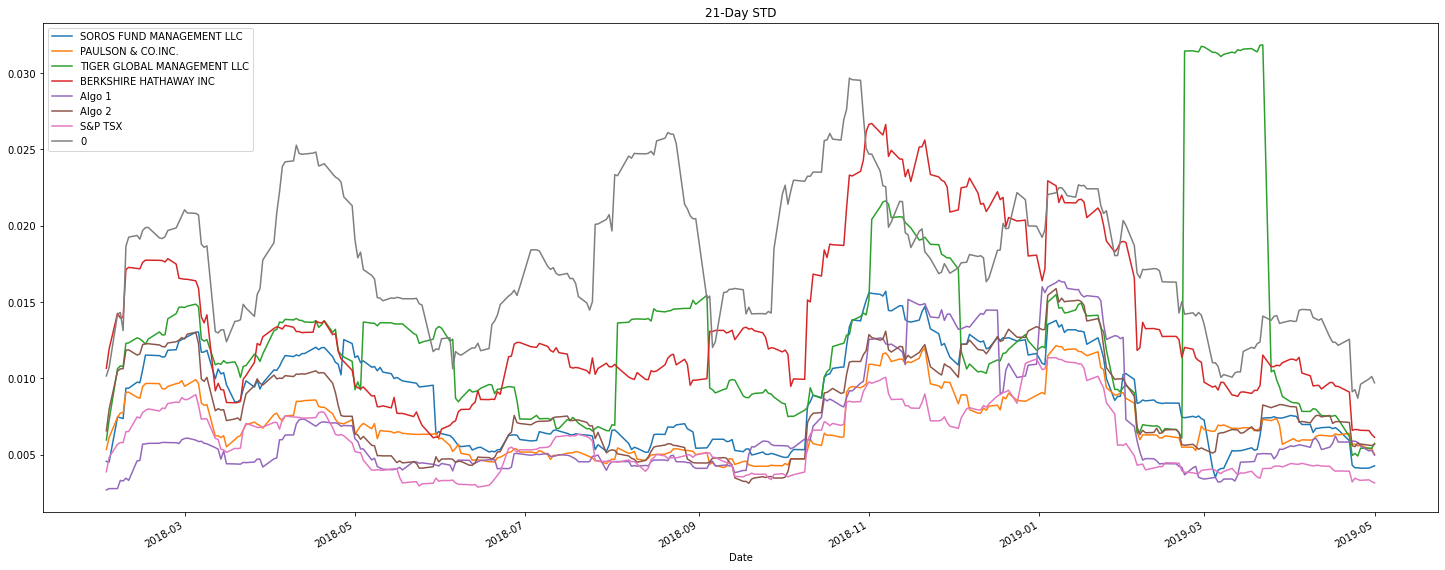

In [56]:
# Calculate rolling standard deviation
rolling_std = all_portfolio_returns.rolling(window=21).std()

# Plot rolling standard deviation
rolling_std.plot(figsize=(25,10), title="21-Day STD")

### Calculate and plot the correlation

<AxesSubplot:>

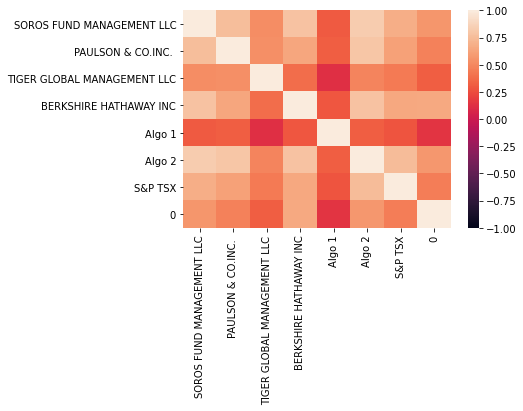

In [57]:
# Calculate and plot the correlation
custom_correlation = all_portfolio_returns.corr()

# import seaborn to plot correlation
import seaborn as sns

# Create a heatmap from the correlation values and adjust the scale
sns.heatmap(custom_correlation, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [58]:
# Calculate and plot Beta
# Calculate 60-day rolling covariance of my custom portfolio
rolling_covariance = all_portfolio_returns["0"].rolling(window=60).cov(all_portfolio_returns["S&P TSX"])

# Calculate 60-day rolling variance of S&P TSX
rolling_variance = all_portfolio_returns["S&P TSX"].rolling(window=60).var()

# Computing 60-day rolling beta
rolling_beta = rolling_covariance / rolling_variance

# Plot beta trend
rolling_beta.plot(figsize=(25,10), title="Rolling 60-Day Beta of My Portfolio")

KeyError: '0'

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios
annual_sharpe_ratios = (all_portfolio_returns.mean() * 252) / (annualized_std)
annual_sharpe_ratios

In [ ]:
# Visualize the sharpe ratios as a bar plot
annual_sharpe_ratios.plot(kind="bar", figsize=(10,5), title="Sharpe Ratios")

### How does your portfolio do?

My portfolio does better than the market (S&P TSX 60) and better than most of the whale portfolios, however it does not do better than the algorithmic strategy 'Algo 1' and the 'BERKSHIRE HATHAWAY INC' whale portfolio.